In [1]:
from sklearn.datasets import load_digits
df = load_digits()
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [22]:
from sklearn.model_selection import train_test_split

X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [21]:
print("X_train shape : {}, y_train shape : {}.".format(X_train.shape, y_train.shape))
print("X_test shape : {}, y_test shape : {}.".format(X_test.shape, y_test.shape))

X_train shape : (1257, 64), y_train shape : (1257,).
X_test shape : (540, 64), y_test shape : (540,).


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
print(X_train)

[[0.     0.     0.     ... 0.5    0.     0.    ]
 [0.     0.     0.4375 ... 0.     0.     0.    ]
 [0.     0.     0.0625 ... 0.4375 0.     0.    ]
 ...
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.125  ... 0.5625 0.     0.    ]
 [0.     0.     0.0625 ... 0.75   0.0625 0.    ]]


In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        53
           3       0.98      1.00      0.99        55
           4       0.96      1.00      0.98        54
           5       1.00      0.98      0.99        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       0.98      0.92      0.95        52
           9       0.98      0.96      0.97        54

    accuracy                           0.99       540
   macro avg       0.99      0.98      0.98       540
weighted avg       0.99      0.99      0.99       540



In [11]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[53  0  0  0  1  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  1]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  2  0  1  0  0  0  1 48  0]
 [ 0  0  0  0  1  0  0  0  1 52]]


<AxesSubplot:>

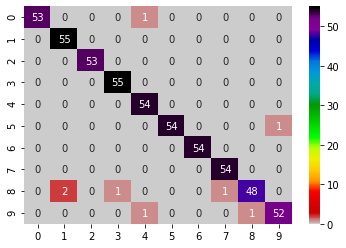

In [12]:
import seaborn as sb
sb.heatmap(confusion, annot=True, cmap='nipy_spectral_r')

In [17]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)

scores = cross_val_score(estimator=knn, X=df.data, y=df.target, cv=kfold)

print('Scores: {} '.format(scores))
print('Mean accuracy: {} '.format(scores.mean()))
print('Accuracy standard deviation: {} '.format(scores.std()))

Scores: [0.98888889 0.99444444 0.98333333 0.97777778 0.97777778 0.97777778
 0.98333333 1.         0.98882682 1.        ] 
Mean accuracy: 0.9872160148975793 
Accuracy standard deviation: 0.008257695334594247 


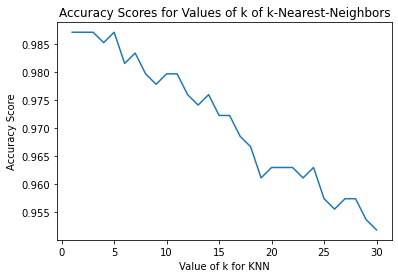

In [23]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
k_range = list(range(1,31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [24]:
for i in range(0,30):
  print("k = {} ====> accuracy = {}".format(i+1, scores[i]))

k = 1 ====> accuracy = 0.987037037037037
k = 2 ====> accuracy = 0.987037037037037
k = 3 ====> accuracy = 0.987037037037037
k = 4 ====> accuracy = 0.9851851851851852
k = 5 ====> accuracy = 0.987037037037037
k = 6 ====> accuracy = 0.9814814814814815
k = 7 ====> accuracy = 0.9833333333333333
k = 8 ====> accuracy = 0.9796296296296296
k = 9 ====> accuracy = 0.9777777777777777
k = 10 ====> accuracy = 0.9796296296296296
k = 11 ====> accuracy = 0.9796296296296296
k = 12 ====> accuracy = 0.975925925925926
k = 13 ====> accuracy = 0.9740740740740741
k = 14 ====> accuracy = 0.975925925925926
k = 15 ====> accuracy = 0.9722222222222222
k = 16 ====> accuracy = 0.9722222222222222
k = 17 ====> accuracy = 0.9685185185185186
k = 18 ====> accuracy = 0.9666666666666667
k = 19 ====> accuracy = 0.9611111111111111
k = 20 ====> accuracy = 0.9629629629629629
k = 21 ====> accuracy = 0.9629629629629629
k = 22 ====> accuracy = 0.9629629629629629
k = 23 ====> accuracy = 0.9611111111111111
k = 24 ====> accuracy = 0.

In [28]:
scores = []
for k in range(1, 31):
    kfold = KFold(n_splits=10, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(estimator=knn,
    X=df.data, y=df.target, cv=kfold))
for i in range(0,30):
  print("k = {} ====> accuracy = {}".format(i+1, scores[i].mean()))

k = 1 ====> accuracy = 0.9888640595903165
k = 2 ====> accuracy = 0.9855245189323402
k = 3 ====> accuracy = 0.9871973929236499
k = 4 ====> accuracy = 0.986644941030416
k = 5 ====> accuracy = 0.9872036002482931
k = 6 ====> accuracy = 0.986070763500931
k = 7 ====> accuracy = 0.9838733705772812
k = 8 ====> accuracy = 0.983860955927995
k = 9 ====> accuracy = 0.9821880819366854
k = 10 ====> accuracy = 0.9827467411545623
k = 11 ====> accuracy = 0.9832929857231534
k = 12 ====> accuracy = 0.9821787709497206
k = 13 ====> accuracy = 0.9821911855990069
k = 14 ====> accuracy = 0.97772191185599
k = 15 ====> accuracy = 0.9777374301675976
k = 16 ====> accuracy = 0.9799658597144631
k = 17 ====> accuracy = 0.9788671632526382
k = 18 ====> accuracy = 0.9782929857231533
k = 19 ====> accuracy = 0.9771725636250777
k = 20 ====> accuracy = 0.9738485412787089
k = 21 ====> accuracy = 0.9738330229671013
k = 22 ====> accuracy = 0.973280571073867
k = 23 ====> accuracy = 0.9693978895096214
k = 24 ====> accuracy = 0.

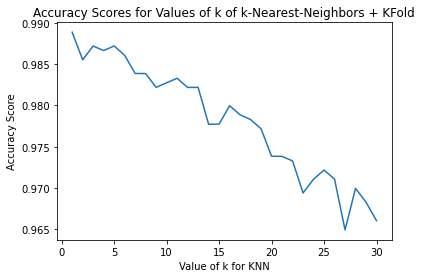

In [32]:
scoresMean = []
for l in scores:
    scoresMean.append(l.mean())
plt.plot(k_range, scoresMean)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors + KFold')
plt.show()